<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 2, semester 1</center>
<center>Lecturer: Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(send mail)</a></center>

# Graphs and Matrices 3: Test

## Table of contents

- [Exercise 1: A random walk](#RW)
- [Exercise 2: Letters $a$ come by three](#isolated)
- [Exercise 3: A coin game](#frog)
- [Exercise 4: Balls in bins](#color)



In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()


In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy             # package for symbolic computation
from sympy import *


<!--<div markdown=1 class="Rmk"> Here is the Latex code of a matrix that you can copy/paste throughout the notebook:
$$
M=
\begin{matrix}
v_1 \\ v_2 \\ v_3 
\end{matrix}
\begin{pmatrix}
1 & 1 & 0\\
0 & 0 & 1\\
0 & 1 & 0\\
\end{pmatrix}.
$$-->


<div markdown=1 class=Abstract>

# Please read!

#### Guidelines for graded notebooks

* This notebook is graded, you must submit the .pynb file on the moodle at the end of the session.
* Submission is due at 5:35 pm. No late submission is permitted.
* The work is **individual**. Copy/pasting has been very severely punished in previous years.
* You can access previous notebooks and the lecture notes (and any online documentation on numpy, python,...).
* The four exercises are independent. You can of course solve the exercices in any order.
* Each function must be tested (for your sake, it also must be commented).
* Mathematical explanations have to be given in the corresponding "Answer" cell (not as comments of the code). Try to be rigorous and concise.
* Here is a sample of a matrix in LateX that you can copy/paste if needed:
$$
A=
\begin{matrix}
 u \\ v \\ w 
\end{matrix}
\begin{pmatrix}
0 & 1 & 0  \\
0 & 0 & 0\\
0 &  1 & 1\\
\end{pmatrix}.
$$


Here is a sample of a code to define a matrix in numpy and raise it to some power:

In [4]:
TransitionMatrix=np.zeros([8,8])
for k in range(8):
    TransitionMatrix[k,k]=1/2
    TransitionMatrix[k,(k+1)%8]=1/2
print(TransitionMatrix)
print(np.linalg.matrix_power(TransitionMatrix,20))

[[0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.5 0.  0.  0.  0.  0.  0.  0.5]]
[[0.12475586 0.1612854  0.17655945 0.1612854  0.12475586 0.0887146
  0.07392883 0.0887146 ]
 [0.0887146  0.12475586 0.1612854  0.17655945 0.1612854  0.12475586
  0.0887146  0.07392883]
 [0.07392883 0.0887146  0.12475586 0.1612854  0.17655945 0.1612854
  0.12475586 0.0887146 ]
 [0.0887146  0.07392883 0.0887146  0.12475586 0.1612854  0.17655945
  0.1612854  0.12475586]
 [0.12475586 0.0887146  0.07392883 0.0887146  0.12475586 0.1612854
  0.17655945 0.1612854 ]
 [0.1612854  0.12475586 0.0887146  0.07392883 0.0887146  0.12475586
  0.1612854  0.17655945]
 [0.17655945 0.1612854  0.12475586 0.0887146  0.07392883 0.0887146
  0.12475586 0.1612854 ]
 [0.1612854  0.17655945 0.1612854  0.12475586 0.0887146  0.07392883
  0.

<a id='RW'></a>

## Exercise 1: A random walk

Fix $L\geq 3$ throughout the exercise. We consider the sequence of random variables $(X_0,X_1,X_2,\dots)$ with values in $\{0,1,\dots,L-1\}$ whose distribution is defined by:
* $X_0=0$
* For each $k\geq 1$,
$$
X_{k+1}=
\begin{cases}
X_k + 2\ \ \mathrm{mod}(L)&\text{ with probability }1/2,\\
X_k - 1\ \ \mathrm{mod}(L)&\text{ with probability }1/2.
\end{cases}
$$
The sequence $(X_k)_{k\geq 0}$ is called a  random walk on $\{0,1,\dots,L-1\}$.


<div markdown=1 class="DoIt"> 

1. Using a transition matrix on the set $\{0,1,\dots,L-1\}$ write a function which computes the function
$(k,\ell)\mapsto \mathbb{P}(X_k=\ell)$.
<br>
(For $L=20$ I find $\mathbb{P}(X_{15}=0)=0.091644...$.)

2. An important theorem in Markov chain theory (beyond the scope of MAA205) states that if $L$ is not divisible by $3$  then the distribution of $X_k$ tends to the  uniform distribution in $\{0,1,\dots,L-1\}$. Illustrate this result for $L=20$: draw a plot supporting that<br>
$$
\lim_{k\to +\infty}  \mathbb{P}(X_k=0) =\frac{1}{L}.
$$
<i>(Be aware that the convergence is quite slow.)</i>

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.5        0.         0.         0.5        0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.25       0.         0.         0.25       0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.16666667 0.         0.         0.16666667
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.125      0.         0.
  0.125      0.         0.         0.         0.         0.
  0.    

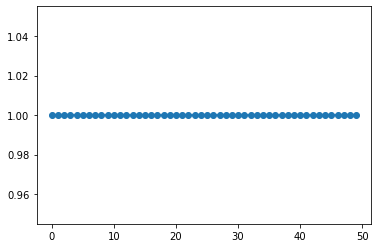

In [52]:
# Question 1
def Matrix(L):
    Matrix=np.zeros([L+1,L+1])
    Matrix[0,0]=1
    for i in range(1,L):
        for j in range(L):
            r1 = (i+2)%L
            r2 = (i-1) %L
            if r1<0:               # to avoid negative remainders
                r1+=L
            if r2<0:
                r2+=L
                
            if j==r1:
                Matrix[i,j] += 1/(2*i)
            if j==r2 :
                Matrix[i,j] += 1/(2*i)
    return Matrix
print(Matrix(20))

def Proba(L,l,k):
    Power_of_M=np.linalg.matrix_power(Matrix(L),k)
    return Power_of_M[0,l]
    
print(Proba(20,0,15))

# Question 2
plt.plot([Proba(20,0,k) for k in range(50)],'o-')
plt.show()



<div markdown=1 class="Answers"> 
I seem to have an uncorrect matrix:(

**Question 2.** 
We plot the distribution  $k\mapsto \mathbb{P}(X(k)=0)$ for L=20 and see if it converges to 1/20.


<a id='isolated'></a>
## Exercise 2. Letters $a$ come by three

<div markdown=1 class="DoIt"> 

We consider words $w$ with letters $a,b$. For $n\geq 2$ let $I_n$ be the number of words $w=(w_1,w_2,\dots,w_n)$ of length $n$ such that runs of consecutive $a$'s all have length $\geq 3$. 

For example $I_5=7$ since the only possibilities are
$$
aaaaa,\ aaaab,\ aaabb,\ baaaa,\ baaab,\ bbaaa,\ bbbbb.
$$

Compute $I_{30}$ using a graph and its adjacency matrix. You must explain carefully which graph and which coefficients of the matrix you consider.

<i>(To check your result: I find $I_{10}=72$.)</i>


<div markdown=1 class="Answers"> 
The number $I_n$ corresponds to the number of paths starting from $a$ or $b$ and of length $n-1$ in the graph whose adjacency matrix is
$$
A=
\begin{matrix}
b \\ a \\ a' \\ a''
\end{matrix}
\begin{pmatrix}
1 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
1 & 0 & 0 & 1
\end{pmatrix}.
$$
The vertices $a,a',a''$ ensure that there are always $3$ consecutive $a$'s.
$I_n$ is the sum of all coefficients in the two first lines of matrix $A^{n-1}$.

I find $I_{10}=72$

In [37]:
A=np.matrix([[1,1,0,0],[0,0,1,0],[0,0,0,1],[1,0,0,1]])
List=[]
for n in range(1,31):
    Mat=A**(n-1)
    MatBis=Mat[0:2,]
    List.append(np.sum(MatBis))
print(List[8])


72


<a id="frog"></a>
## Exercise 3: A coin game

We consider the following game of chance:<br><br>
Let $k\geq 1$ be an integer. A player starts with one euro, at each time step a fair coin is tossed. If the coin turns Heads then the player wins 2 euros, if the coin turns Tails then they lose 1 euro. The game goes until either the player is ruined, or just after the $k$-th coin has been tossed. 

Here are two sample games for $k=6$:
\begin{align*}
&1 \stackrel{\text{Heads}}{\longrightarrow} 3 \stackrel{\text{Tails}}{\longrightarrow} 2
\stackrel{\text{Tails}}{\longrightarrow} 1 \stackrel{\text{Tails}}{\longrightarrow} 0 \text{    (Ruined)},\\
&1 \stackrel{\text{Heads}}{\longrightarrow} 3 \stackrel{\text{Heads}}{\longrightarrow} 5
\stackrel{\text{Tails}}{\longrightarrow} 4 \stackrel{\text{Tails}}{\longrightarrow} 3
\stackrel{\text{Tails}}{\longrightarrow} 2 \stackrel{\text{Heads}}{\longrightarrow} 4
\text{    (Stop)}.
\end{align*}

Let $W\in \{0,1,2,\dots, 2k+1\}$ be the random variable given by the player's money at the end of the game. In the above examples $W=0$ and $W=4$ respectively.


<div markdown=1 class="DoIt"> 

1. Using a Markov chain, write a function which computes the probability $p_k$ that the player is ruined at the end of the game (<i>i.e.</i> $\mathbb{P}(W=0)$). Explain your strategy.
<br>
<i>(To check your result, I find $p_{40}\approx 0.6171...$.)</i>
2. Plot the distribution of $W$ for $k=20$.

<div markdown=1 class="Answers"> Question 1.
The markov chain is:
* $X_0=1$
* For each $k\geq 1$,
$$
X_{k+1}=
\begin{cases}
X_k + 2\ \ \text{ with probability 0.5 if the coin turns Heads},\\
X_k - 1\ \ \text{ with probability 0.5 if the coin turns Tails}.
\end{cases}
$$

In [53]:
# Question 1

# Question 2


<a id='color'></a>
## Exercise 4. Balls in bins

<div markdown=1 class="DoIt"> 
A urn contains 5 balls, one of each color: Black, White, Red, Green, Yellow (B,W,R,G,Y). At time $1,2,3,\dots$ a ball is drawn uniformly at random and put back into the urn. For $n\geq 1$ denote by $X_n \in\{B,W,R,G,Y\}$ the color of the $n$-th ball.

For $n\geq 3$ let $E_n$ be the event
\begin{align*}
E_n&=\{\text{ The Green ball has been drawn at least 3 times in a row before time }n\ \}\\
&=\{\exists\ 1\leq k\leq n-2\text{ such that }X_{k}=X_{k+1}=X_{k+2}=G\}.
\end{align*}
<br>
It is easy to see that
$$
\mathbb{P}(E_3)=\mathbb{P}(X_{1}=X_{2}=X_{3}=G)= (1/5)^3=0.008.
$$
but there is no obvious way to compute $\mathbb{P}(E_n)$ for arbitrary $n$.

The goal of the exercise is to solve this problem with Markov chains. We first introduce a graph $\mathcal{R}$ with vertices $\{r_0,r_1,r_2,r_3\}$. We define a Markov chain $(M_n)_{n\geq 0}$ on $\mathcal{R}$ which keeps track of the current record of consecutive $G$'s. Formally $(M_n)_{n\geq 0}$ is defined as follows: $M_0=r_0$ and for $n\geq 1$,

* $M_n=r_0$ if:
    * $E_n$ is not true and $X_n\neq G$.
* $M_n=r_1$ if:
    * $E_n$ is not true and $X_n=G$, $X_{n-1}\neq G$.
* $M_n=r_2$ if:
   * $n\geq 2$, $E_n$ is not true and $X_n=G,X_{n-1}= G,X_{n-2}\neq G$
* $M_n=r_3$ if
   * $E_n$ is true.

Here is an example:
<font>
<table>
<tr>
<td > $n$</td>
<td >$0$</td><td >$1$</td><td >$2$</td><td >$3$</td><td >$4$</td><td >$5$</td><td >$6$</td><td >$7$</td><td >$8$</td>
</tr>
<tr>
<td > $X_n$</td>
<td >$/$</td><td >$B$</td><td >$G$</td><td >$Y$</td><td >$G$</td><td >$G$</td><td >$G$</td><td >$G$</td><td >$B$</td>
</tr>
<tr>
<td > $M_n$</td>
<td >$r_0$</td><td >$r_0$</td><td >$r_1$</td><td >$r_0$</td><td >$r_1$</td><td >$r_2$</td><td >$r_3$</td><td >$r_3$</td><td >$r_3$</td>           </tr>
</table>
</font>

<b>Question 1</b>. We admit that $(M_n)$ defined as above is a Markov chain. Find its transition matrix
(explain briefly). 

<b>Question 2</b>.
Write a function which computes $\mathbb{P}(E_n)$ for every $n$. (Explain briefly how you use the transition matrix.)

<i>(In order to check your result: I find $\mathbb{P}(E_{10})=0.052349...$)</i>

<b>Question 3</b>. Find the minimal $n$ such that $E_n$ occurs with more than $90\%$ chance.


<div markdown=1 class="Answers"> Question 1. 

Question 2.


In [8]:
# Question 2 

# Question 3